<a href="https://colab.research.google.com/github/Dedulus/Dedulus/blob/main/Pnemonia_detection_with_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Mounting the Google Colab for uploading the dataset(dataset was uploaded to Google drive in advance)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Main directory path is set
import os
main_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1"
#Train directory path is set
train_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train"
#Test directory path is set
test_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/test"


#directory with the training Pnemoniaimages
train_pne_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia"
#directory with the training normal images
train_normal_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/no_pneumonia" 


#directory with the testing Pnemonia images
test_pne_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/test/pneumonia"
#directory with the testing normal images
test_normal_dir = "/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/test/pneumonia"

In [ ]:
#print the filenames
train_Pnem_names = os.listdir(train_pne_dir)
print(train_Pnem_names[:10])

trian_normal_names = os.listdir(train_normal_dir)
print(trian_normal_names[:10])

test_Pnem_names = os.listdir(test_pne_dir)
print(test_Pnem_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['acea0494-388b-4745-a430-892751494e8c.png', '239e9d1c-e5c1-4798-a6ba-64fd64e7c486.png', '2411eac7-f0b6-4eb8-82ec-d5f1487bdebf.png', '34985379-397f-4afb-9ca7-538cc629703b.png', 'b72afa3e-644b-479a-845d-14fe8351cdb0.png', '274f1a78-5887-4694-8fd6-a1847d9bc486.png', 'bcaa0edc-16d6-44b7-b548-91ddf6ed5cec.png', 'f49074c2-e73d-4884-804e-a2caab37bcf9.png', '6882ecfb-e577-42f1-9cbd-5f6408ae189a.png', 'be9624bc-824f-4951-9f81-087d6528eeec.png']
['5bc74cc9-674d-461f-ac57-f355f118ad46.png', '5d35aa33-9d71-412e-88d4-5792c7fd216f.png', 'bf1fe75b-d77c-4580-b832-a2cae12c3d47.png', 'e7f2ff6b-e64f-4ff1-ae10-2963c655aa2d.png', '7a5cdc7a-bcde-42bb-b2d9-02b9b0c740c7.png', '9a3512ea-820e-481e-b0fb-2b4a53dfb43b.png', 'a3abb0a4-660e-4a07-b5a7-d7d74f4bce58.png', '64677c31-fa28-4732-ba10-5571a711a8bd.png', 'ea16d87a-1406-46fe-af11-31c97cccc698.png', '84a2adb0-52b6-4a64-908d-538356e67d6d.png']
['ac1c77f9-db17-4bb4-886f-718a265eaa4d.png', 'a2990f44-8592-4427-b704-b19565a0bedd.png', '33e4f74e-b8f2-470b-8815-6ee3

In [ ]:
#print the total no of images present in each dir
print("Total no of images in the training set :",len(train_Pnem_names+trian_normal_names))
print("Total no of images in test set :" , len(test_Pnem_names+test_normal_names))

Total no of images in the training set : 3000
Total no of images in test set : 210


Data Visualization

['/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/acea0494-388b-4745-a430-892751494e8c.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/239e9d1c-e5c1-4798-a6ba-64fd64e7c486.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/2411eac7-f0b6-4eb8-82ec-d5f1487bdebf.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/34985379-397f-4afb-9ca7-538cc629703b.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/b72afa3e-644b-479a-845d-14fe8351cdb0.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/274f1a78-5887-4694-8fd6-a1847d9bc486.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/bcaa0edc-16d6-44b7-b548-91ddf6ed5cec.png', '/content/drive/MyDrive/Pnemonia_Assingement_act/data-task1/train/pneumonia/f49074c2-e73d-4884-804e-a2caab37bcf9.png']
['/content/drive/MyDrive/Pnemonia_Assingement_a

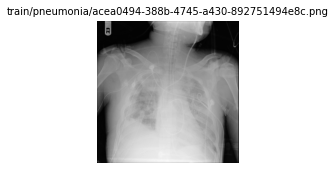

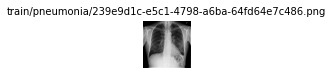

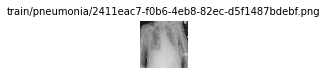

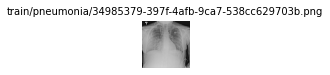

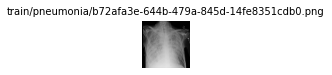

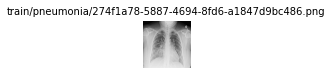

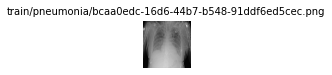

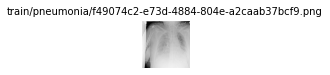

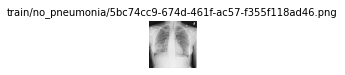

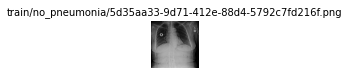

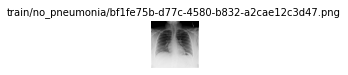

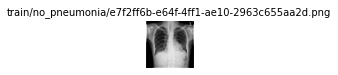

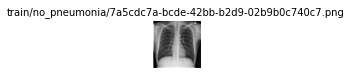

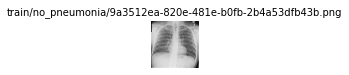

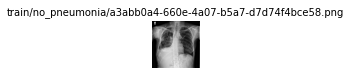

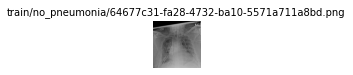

In [ ]:
# plotting a grid of 16 images (8 images of Pnemonia and 8 images of Normal)
import matplotlib.image as mp
#setting the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#gettting the filenames from the Pnemonia & normal dir of the train dataset
Pnemonia_pic = [os.path.join(train_pne_dir,filename)for filename in train_Pnem_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in trian_normal_names[0:8]]



#print the list
print(Pnemonia_pic)
print(normal_pic)


#merge the Pnemonia and normal list
merged_list = Pnemonia_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img = mp.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap = 'gray')
  plt.show()

Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

trian_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 2401 images belonging to 2 classes.
Found 599 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get the class indices
trian_generator.class_indices


{'no_pneumonia': 0, 'pneumonia': 1}

In [ ]:
#get the image shape
trian_generator.image_shape


(150, 150, 3)

Initiating InceptionV3 for Tranfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.optimizers import RMSprop


# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model Visualization

In [ ]:
print ("My model has" + " " + str(len(model.layers)) + " " + "layers") # NUmber of layers in the model

My model has 315 layers


In [ ]:
from keras.utils.vis_utils import plot_model 
plot_model(model, to_file='layers_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

In [ ]:
from PIL import ImageFont

In [ ]:
import visualkeras

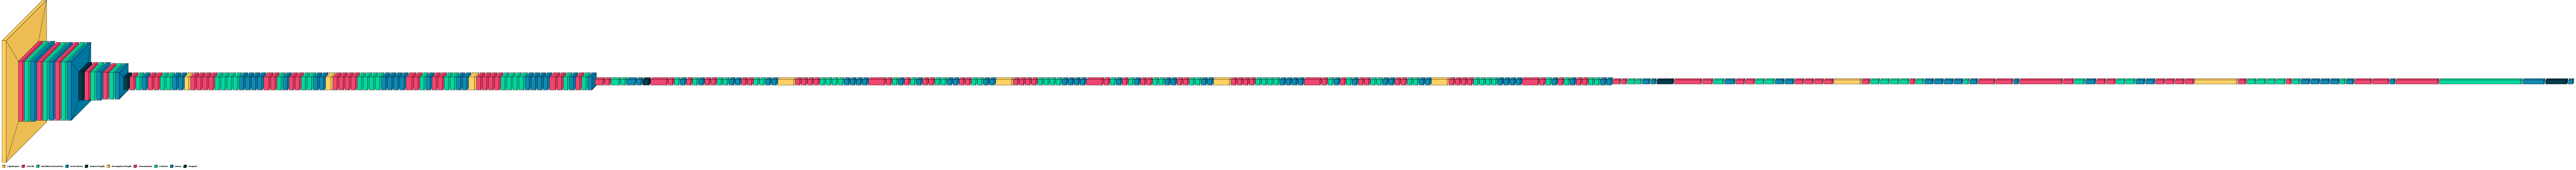

In [ ]:
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font) 

In [ ]:
!nvidia-smi

Mon May 16 20:04:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |    774MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = model.fit(trian_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
76/76 [==============================] - 681s 9s/step - loss: 1.7986 - acc: 0.7259 - val_loss: 0.5532 - val_acc: 0.8147
Epoch 2/30
76/76 [==============================] - 76s 998ms/step - loss: 0.5833 - acc: 0.7638 - val_loss: 0.4551 - val_acc: 0.8063
Epoch 3/30
76/76 [==============================] - 75s 984ms/step - loss: 0.5038 - acc: 0.7772 - val_loss: 0.5411 - val_acc: 0.7095
Epoch 4/30
76/76 [==============================] - 77s 1s/step - loss: 0.4673 - acc: 0.7851 - val_loss: 0.4279 - val_acc: 0.8080
Epoch 5/30
76/76 [==============================] - 76s 1s/step - loss: 0.4464 - acc: 0.8009 - val_loss: 0.5090 - val_acc: 0.8164
Epoch 6/30
76/76 [==============================] - 76s 998ms/step - loss: 0.4485 - acc: 0.8001 - val_loss: 0.4388 - val_acc: 0.8214
Epoch 7/30
76/76 [==============================] - 74s 977ms/step - loss: 0.4368 - acc: 0.8201 - val_loss: 0.5083 - val_acc: 0.8047
Epoch 8/30
76/76 [==============================] - 75s 982ms/step - loss: 0.

# TASK 7 : Performance Evaluation

In [ ]:
model.save('/content/drive/MyDrive/Pnemonia_Assingement_act/Mmodel_inceptionv3_tranferlearning.h5')

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Text(0.5, 0, 'epoch')

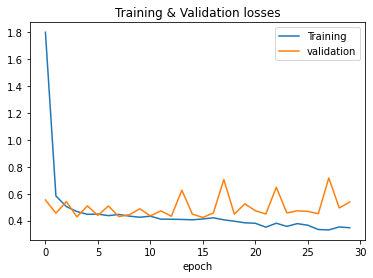

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])
plt.title('Training & Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

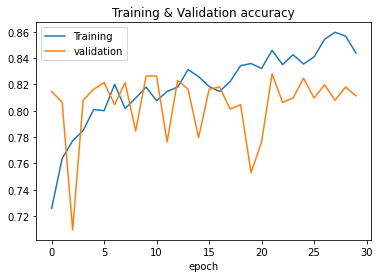

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'validation'])
plt.title('Training & Validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test loss : {} test acc :{}' .format(test_loss,test_acc))

16/16 [==============================] - 145s 10s/step - loss: 0.5724 - accuracy: 0.8160
test loss : 0.572443425655365 test acc :0.8159999847412109
